* [Description des données](#dd)
* [Elimination de quelques variables non pertinentes](#ev)
* [Nettoyage](#ne)
* [Choix des variables cibles (les émissions de CO2 et  la consommation totale d’énergie)](#cv)
* [Analyse exploratoire](#ae)
* [Sauvegarde des données dans un fichier csv](#cs)

In [86]:
import pandas as pd
import numpy as np
import warnings
import missingno as msno
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt 
import folium
from folium import plugins
warnings.filterwarnings('ignore')

# Description des données <a class="anchor" id="dd"></a>

In [87]:
df=pd.read_csv('2016_Building_Energy_Benchmarking.csv')

In [88]:
df.shape

(3376, 46)

In [89]:
df.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [90]:
df.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

In [91]:
df['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

In [92]:
#batiments non destinés à l'habitation
df = df[~df['BuildingType'].str.contains("Multifamily")]
df['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'SPS-District K-12',
       'Campus', 'Nonresidential WA'], dtype=object)

In [93]:
df.shape # la taille passe de (3376, 46) à (1668, 46)

(1668, 46)

# Elimination de quelques variables non pertinentes<a class="anchor" id="ev"></a>

In [94]:
#on remplace les fearures contenant une seule valeur par une variable qu'on pourra l'utiliser en cas de besoin 
DataYear=df['DataYear']
State=df['State']

In [95]:
#variables pas trop pertinentes pour le projet

#DataYear, PrimaryPropertyType,PropertyName,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Comments
df=df.loc[:, ~df.columns.isin(['State','DataYear','PrimaryPropertyType','PropertyName','ZipCode','TaxParcelIdentificationNumber','CouncilDistrictCode','Comments'])]

In [96]:
df.shape

(1668, 38)

<AxesSubplot:>

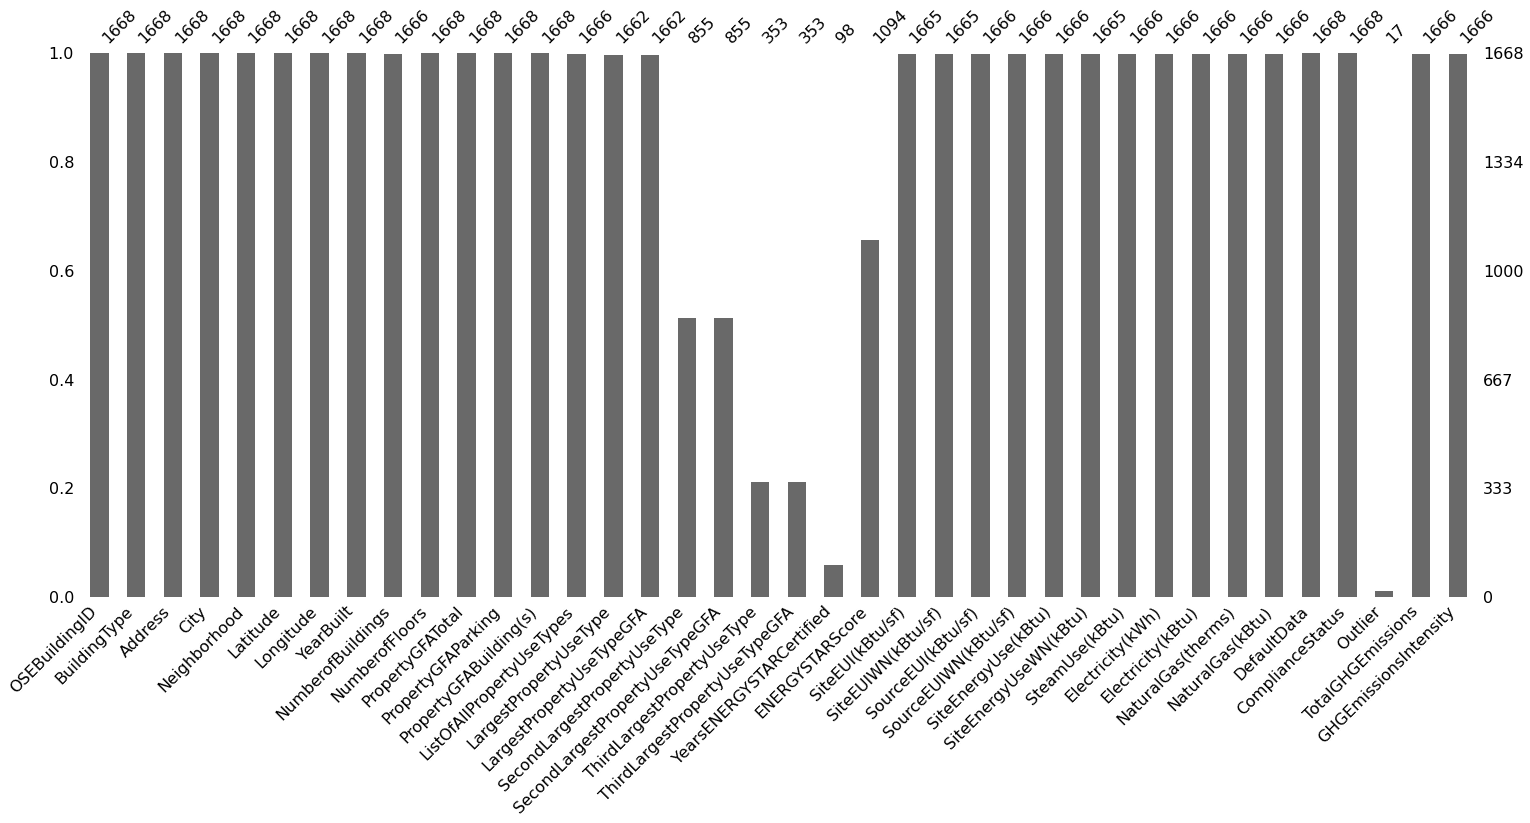

In [97]:
msno.bar(df)

In [98]:
df.describe()

,OSEBuildingID,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,...,SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
count,1668.000000,1668.000000,1668.000000,1668.000000,1666.000000,1668.000000,1.668000e+03,1668.000000,1.668000e+03,1.662000e+03,...,1666.000000,1.666000e+03,1.665000e+03,1.666000e+03,1.666000e+03,1.666000e+03,1.666000e+03,1.666000e+03,1666.000000,1666.000000
mean,16336.346523,47.616054,-122.332908,1961.913669,1.168667,4.121103,1.188427e+05,12897.979017,1.059447e+05,9.876469e+04,...,178.090876,8.437933e+06,8.064790e+06,5.125726e+05,1.712630e+06,5.843493e+06,1.970845e+04,1.970845e+06,184.973301,1.607845
std,13835.292512,0.048168,0.024580,32.741755,2.931409,6.563407,2.973622e+05,42274.511185,2.842116e+05,2.767111e+05,...,185.918749,3.024380e+07,2.203878e+07,5.513944e+06,6.095172e+06,2.079673e+07,9.370814e+04,9.370814e+06,751.976001,2.336882
min,1.000000,47.499170,-122.411820,1900.000000,0.000000,0.000000,1.128500e+04,0.000000,3.636000e+03,5.656000e+03,...,-2.100000,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,-0.800000,-0.020000
25%,582.750000,47.585458,-122.343280,1930.000000,1.000000,1.000000,2.947775e+04,0.000000,2.847525e+04,2.552750e+04,...,79.325003,1.229291e+06,1.294615e+06,0.000000e+00,2.114083e+05,7.213255e+05,0.000000e+00,0.000000e+00,19.967500,0.350000
50%,21143.500000,47.612340,-122.332935,1965.000000,1.000000,2.000000,4.928950e+04,0.000000,4.739150e+04,4.377050e+04,...,134.150002,2.554947e+06,2.685146e+06,0.000000e+00,4.724153e+05,1.611881e+06,4.982630e+03,4.982630e+05,49.580000,0.880000
75%,24602.250000,47.649675,-122.321675,1989.000000,1.000000,4.000000,1.053250e+05,0.000000,9.475975e+04,9.198375e+04,...,205.700001,6.913348e+06,7.109712e+06,0.000000e+00,1.420747e+06,4.847589e+06,1.520000e+04,1.520000e+06,142.382500,1.890000
max,50226.000000,47.733870,-122.258640,2015.000000,111.000000,99.000000,9.320156e+06,512608.000000,9.320156e+06,9.320156e+06,...,2620.000000,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,16870.980000,34.090000


# Nettoyage<a class="anchor" id="ne"></a>

In [99]:
#supprimer les lignes avec TotalGHGEmissions<0
df = df[df['TotalGHGEmissions'] >= 0]

In [100]:
df['Outlier'].unique()

array([nan, 'High outlier', 'Low outlier'], dtype=object)

In [101]:
#supprimer les lignes avec High outlier
df=df[df['Outlier']!='High outlier']
df['Outlier'].unique()

array([nan, 'Low outlier'], dtype=object)

In [102]:
df[['LargestPropertyUseType',           
'LargestPropertyUseTypeGFA',          
'SecondLargestPropertyUseType',       
'SecondLargestPropertyUseTypeGFA',    
'ThirdLargestPropertyUseType',        
'ThirdLargestPropertyUseTypeGFA',   
'YearsENERGYSTARCertified', 
'SiteEUI(kBtu/sf)',                   
'SiteEUIWN(kBtu/sf)',           
'ENERGYSTARScore',    
'SiteEnergyUseWN(kBtu)','Outlier',]]=df[['LargestPropertyUseType',           
'LargestPropertyUseTypeGFA',          
'SecondLargestPropertyUseType',       
'SecondLargestPropertyUseTypeGFA',    
'ThirdLargestPropertyUseType',        
'ThirdLargestPropertyUseTypeGFA',   
'YearsENERGYSTARCertified',
'SiteEUI(kBtu/sf)',                   
'SiteEUIWN(kBtu/sf)', 
'ENERGYSTARScore',    
'SiteEnergyUseWN(kBtu)','Outlier']].fillna(df.mode().iloc[0])

<AxesSubplot:>

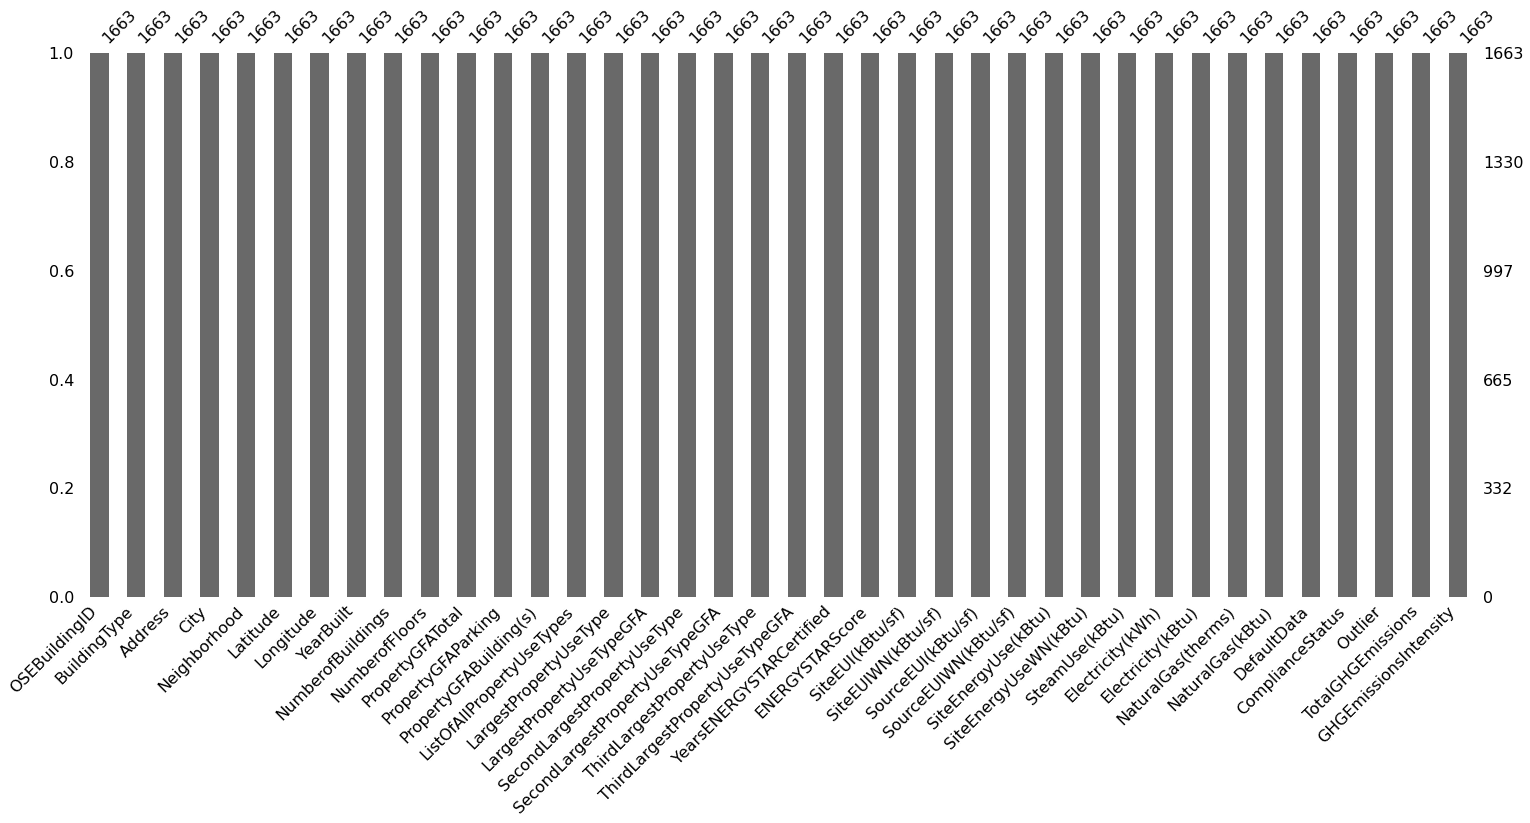

In [103]:
msno.bar(df)

# Choix des variables cibles (les émissions de CO2 et  la consommation totale d’énergie)<a class="anchor" id="cv"></a>

In [104]:
#'GHGEmissionsIntensity',TotalGHGEmissions
#'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)'
#SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf)

# Analyse exploratoire <a class="anchor" id="ae"></a>

### Corrélation


In [105]:
numerci_cols = list(df.select_dtypes([np.number]).columns)
print(numerci_cols)

['OSEBuildingID', 'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity']


In [106]:
#look for correlated variables
#fig=plt.figure(figsize=(25,15))
#font_title = {'family': 'serif',
#              'color':  '#114b98',
#              'weight': 'bold',
#             'size': 18,
#             }

#corr_mat = df[['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 
#              'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore', 
#               'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)', 
#               'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)', 
#               'NaturalGas(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity']].corr()
#sns.heatmap(corr_mat, square=True, linewidths=0.01, annot=True, cmap='coolwarm')
#plt.title("Coefficients de corrélation de Pearson", fontdict=font_title)
#plt.show()

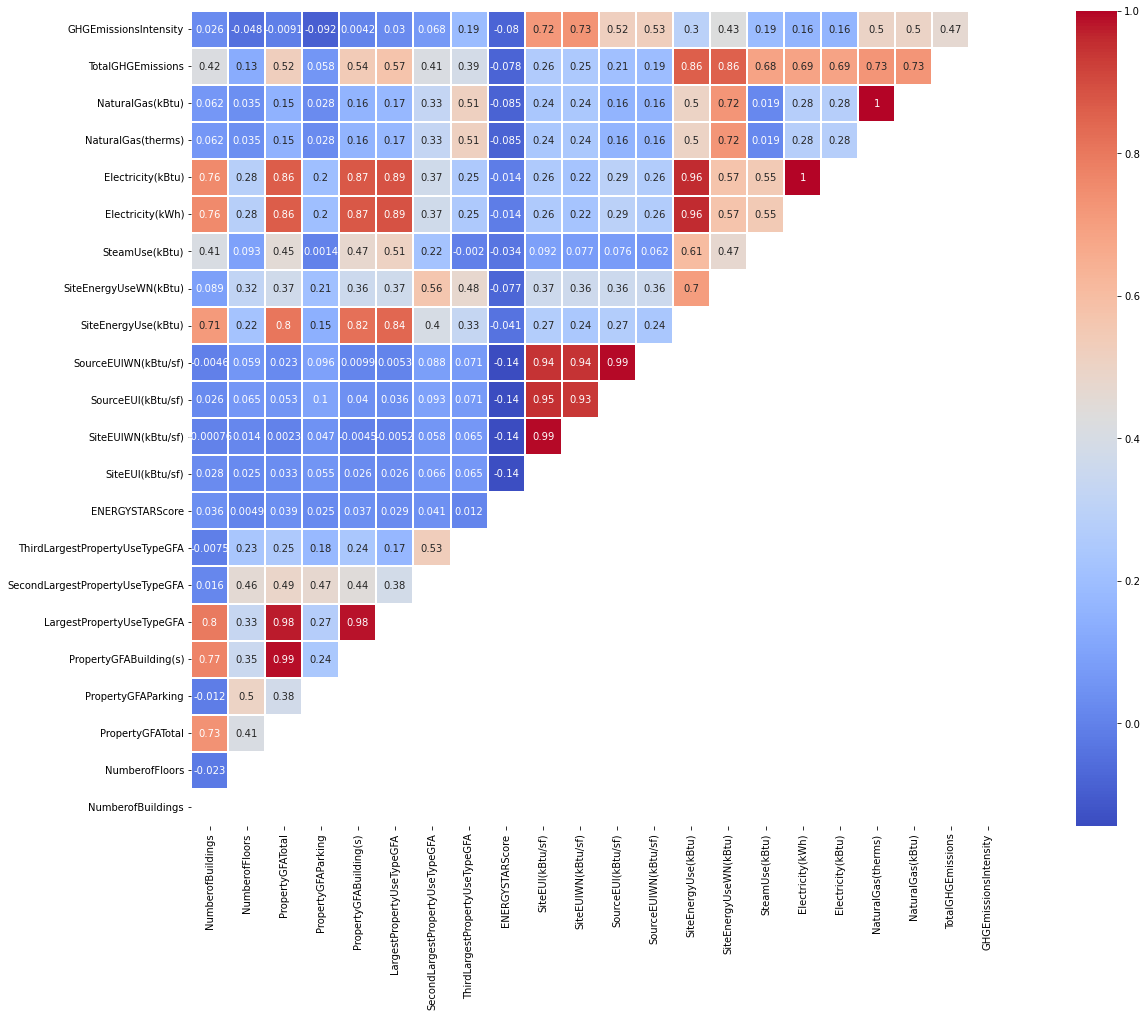

In [107]:
fig=plt.figure(figsize=(25,15))
font_title = {'family': 'serif',
              'color':  '#114b98',
              'weight': 'bold',
              'size': 18,
             }
corr_mat = df[['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 
               'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore',
               'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)', 
               'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
               'TotalGHGEmissions','GHGEmissionsIntensity']].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_mat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr_mat, mask=mask, square=True, linewidths=0.1, annot=True,cmap='coolwarm')
plt.xlim(0, corr_mat.shape[1])
plt.ylim(0, corr_mat.shape[0])
plt.show()

### Analyse univariée

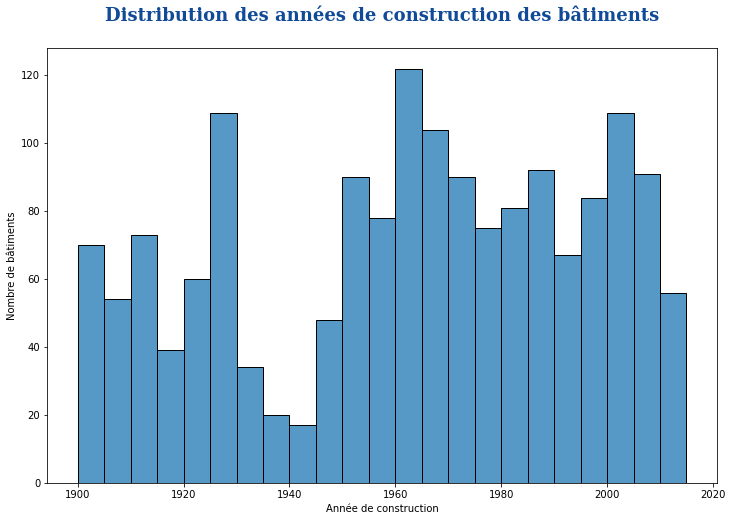

In [108]:
fig = plt.figure(figsize=(12,8))
ax = sns.histplot(data=df, x='YearBuilt', bins=int((df.YearBuilt.max() - df.YearBuilt.min())/5))
ax.set_xlabel("Année de construction")
ax.set_ylabel("Nombre de bâtiments")
plt.title(f"Distribution des années de construction des bâtiments\n", fontdict=font_title)
plt.show()

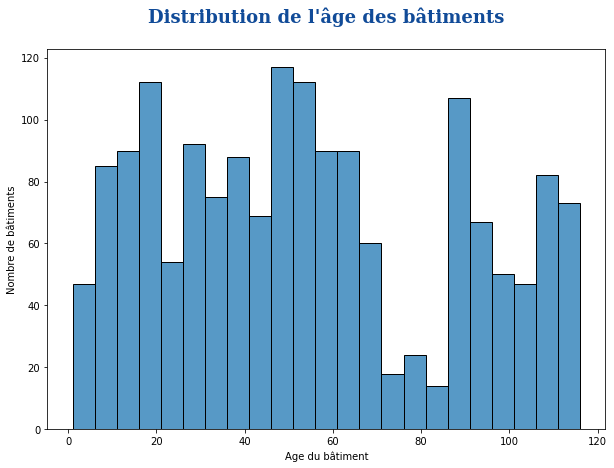

In [109]:
#Ajout de la variable age 
df['BuildingAge'] = DataYear - df['YearBuilt']
# df.drop('YearBuilt', axis=1, inplace=True)

fig = plt.figure(figsize=(10,7))
ax = sns.histplot(data=df, x='BuildingAge', bins=int((df.BuildingAge.max() - df.BuildingAge.min())/5))
ax.set_xlabel("Age du bâtiment")
ax.set_ylabel("Nombre de bâtiments")
plt.title(f"Distribution de l'âge des bâtiments\n", fontdict=font_title)
plt.show()

### Carte d'émission de CO2


In [135]:
import io
import plotly.express as px

In [134]:
#df1=df[['Longitude','Latitude','TotalGHGEmissions']]
df.columns

Index(['OSEBuildingID', 'BuildingType', 'Address', 'City', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'ComplianceStatus', 'Outlier',
       'TotalGHGEmissions', 'GHGEmissionsIntensity', 'BuildingAge'],
      dtype='object')

In [137]:

px.set_mapbox_access_token(open("mapbox_API_key.txt").read())

fig = px.scatter_mapbox(df, lat="Latitude", lon="Longitude",color='TotalGHGEmissions',
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10)
fig.show()

### ENERGYSTARScore

Text(0.5, 1.0, 'ENERGYSTARScore vs OSEBuildingID')

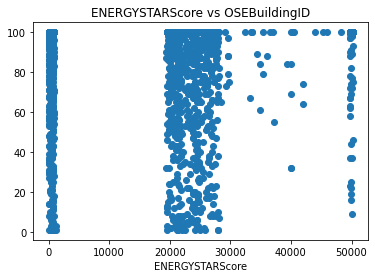

In [128]:
plt.scatter(df['OSEBuildingID'],df['ENERGYSTARScore'])
plt.xlabel('OSEBuildingID')
plt.xlabel('ENERGYSTARScore')
plt.title('ENERGYSTARScore vs OSEBuildingID')

## Sauvegarde des données dans un fichier csv<a class="anchor" id="cs"></a>

In [131]:
#sauvegarde des données cleanées
df.to_csv('prepared_data.csv', sep='\t',index=False)